# Read Chronic_Heart_Disease Dataset

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('framingham.csv')
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# First, let's check if there is any missing value

In [12]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Replace the missing value with the mean value of the variable

In [13]:
# other strategies: removing rows with missing values, or filling with numerical value of 0 or -999 which will
# not occur in the data

new_df = df

new_df['education'] = new_df['education'].fillna(df['education'].mean())
new_df['cigsPerDay'] = new_df['cigsPerDay'].fillna(df['cigsPerDay'].mean())
new_df['BPMeds'] = new_df['BPMeds'].fillna(df['BPMeds'].mean())
new_df['totChol'] = new_df['totChol'].fillna(df['totChol'].mean())
new_df['BMI'] = new_df['BMI'].fillna(df['BMI'].mean())
new_df['heartRate'] = new_df['heartRate'].fillna(df['heartRate'].mean())
new_df['glucose'] = new_df['glucose'].fillna(df['glucose'].mean())

In [14]:
new_df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Let's see the distribution of Heart Disease vs. Non Heart Disease

/var/folders/tw/12hs9sq51w95fp1nl81l38c80000gn/T/ipykernel_12243/1249463942.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=new_df['TenYearCHD'], palette='bright')


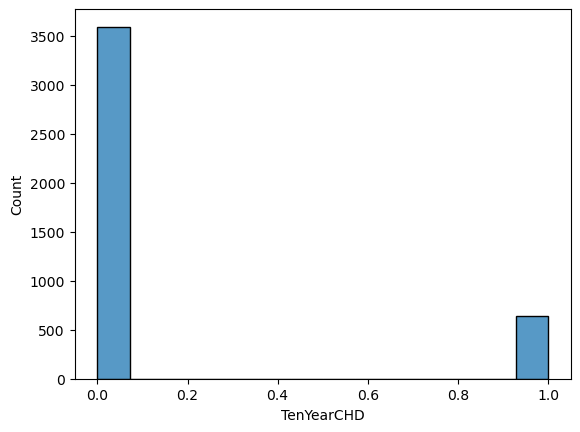

In [15]:
sns.histplot(data=new_df['TenYearCHD'], palette='bright')
plt.show()

# Prepare data and label for model training

In [16]:
# label
y = new_df['TenYearCHD'].to_numpy()
y

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
# data
X = new_df.drop('TenYearCHD', axis = 1).to_numpy()
X

array([[  1.        ,  39.        ,   4.        , ...,  26.97      ,
         80.        ,  77.        ],
       [  0.        ,  46.        ,   2.        , ...,  28.73      ,
         95.        ,  76.        ],
       [  1.        ,  48.        ,   1.        , ...,  25.34      ,
         75.        ,  70.        ],
       ...,
       [  0.        ,  48.        ,   2.        , ...,  22.        ,
         84.        ,  86.        ],
       [  0.        ,  44.        ,   1.        , ...,  19.16      ,
         86.        ,  81.96675325],
       [  0.        ,  52.        ,   2.        , ...,  21.47      ,
         80.        , 107.        ]])

# Data Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

scale = StandardScaler()
scaled_X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

# Import Classifiers and Metrics from Sklearn

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

import matplotlib.pyplot as plt

In [22]:
lc = LogisticRegression()
neigh = KNeighborsClassifier(n_neighbors=3)
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

# Train your ML model with Training Dataset, use model.fit() function

In [23]:
lc.fit(X_train, y_train)
neigh.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

# Training complete, test your model with Testing Dataset

In [24]:
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_knn_predicted = neigh.predict(X_test)
y_knn_pred_proba = neigh.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

# Model Evaluation with confusion matrix and ROC curve

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1082
           1       0.74      0.09      0.16       190

    accuracy                           0.86      1272
   macro avg       0.80      0.54      0.54      1272
weighted avg       0.84      0.86      0.81      1272

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1082
           1       0.29      0.15      0.20       190

    accuracy                           0.82      1272
   macro avg       0.58      0.54      0.55      1272
weighted avg       0.78      0.82      0.79      1272

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1082
           1       0.33      0.01      0.01       190

    accuracy                           0.85      1272
   macro avg       0.59      0.50      0.46      1272
weighted avg       0.77      0.85      0.78      1272

              preci

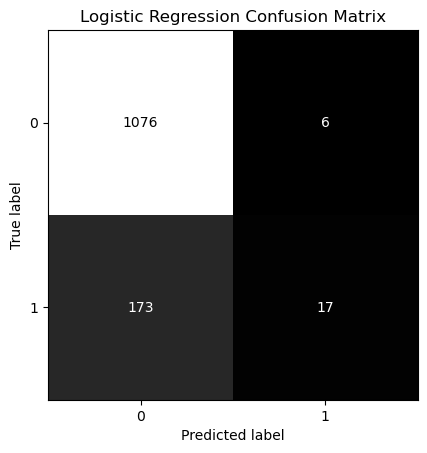

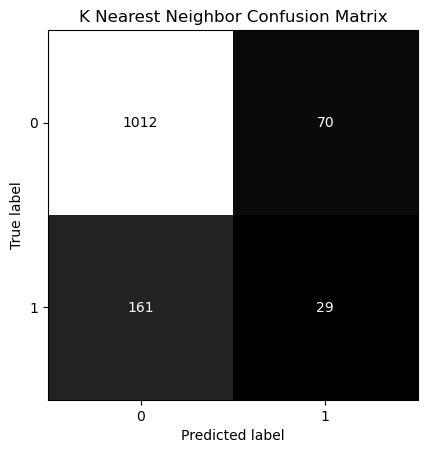

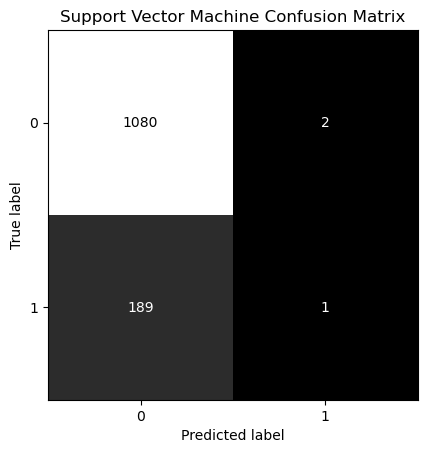

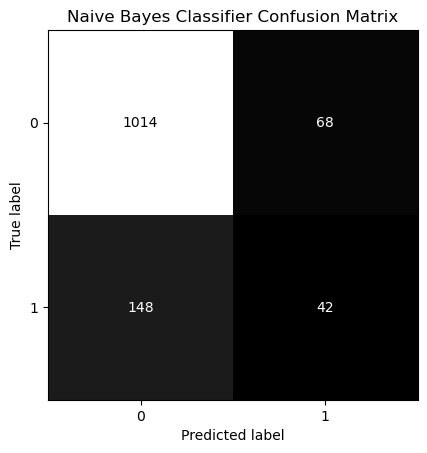

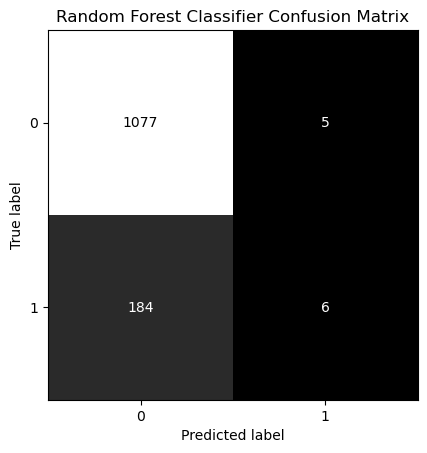

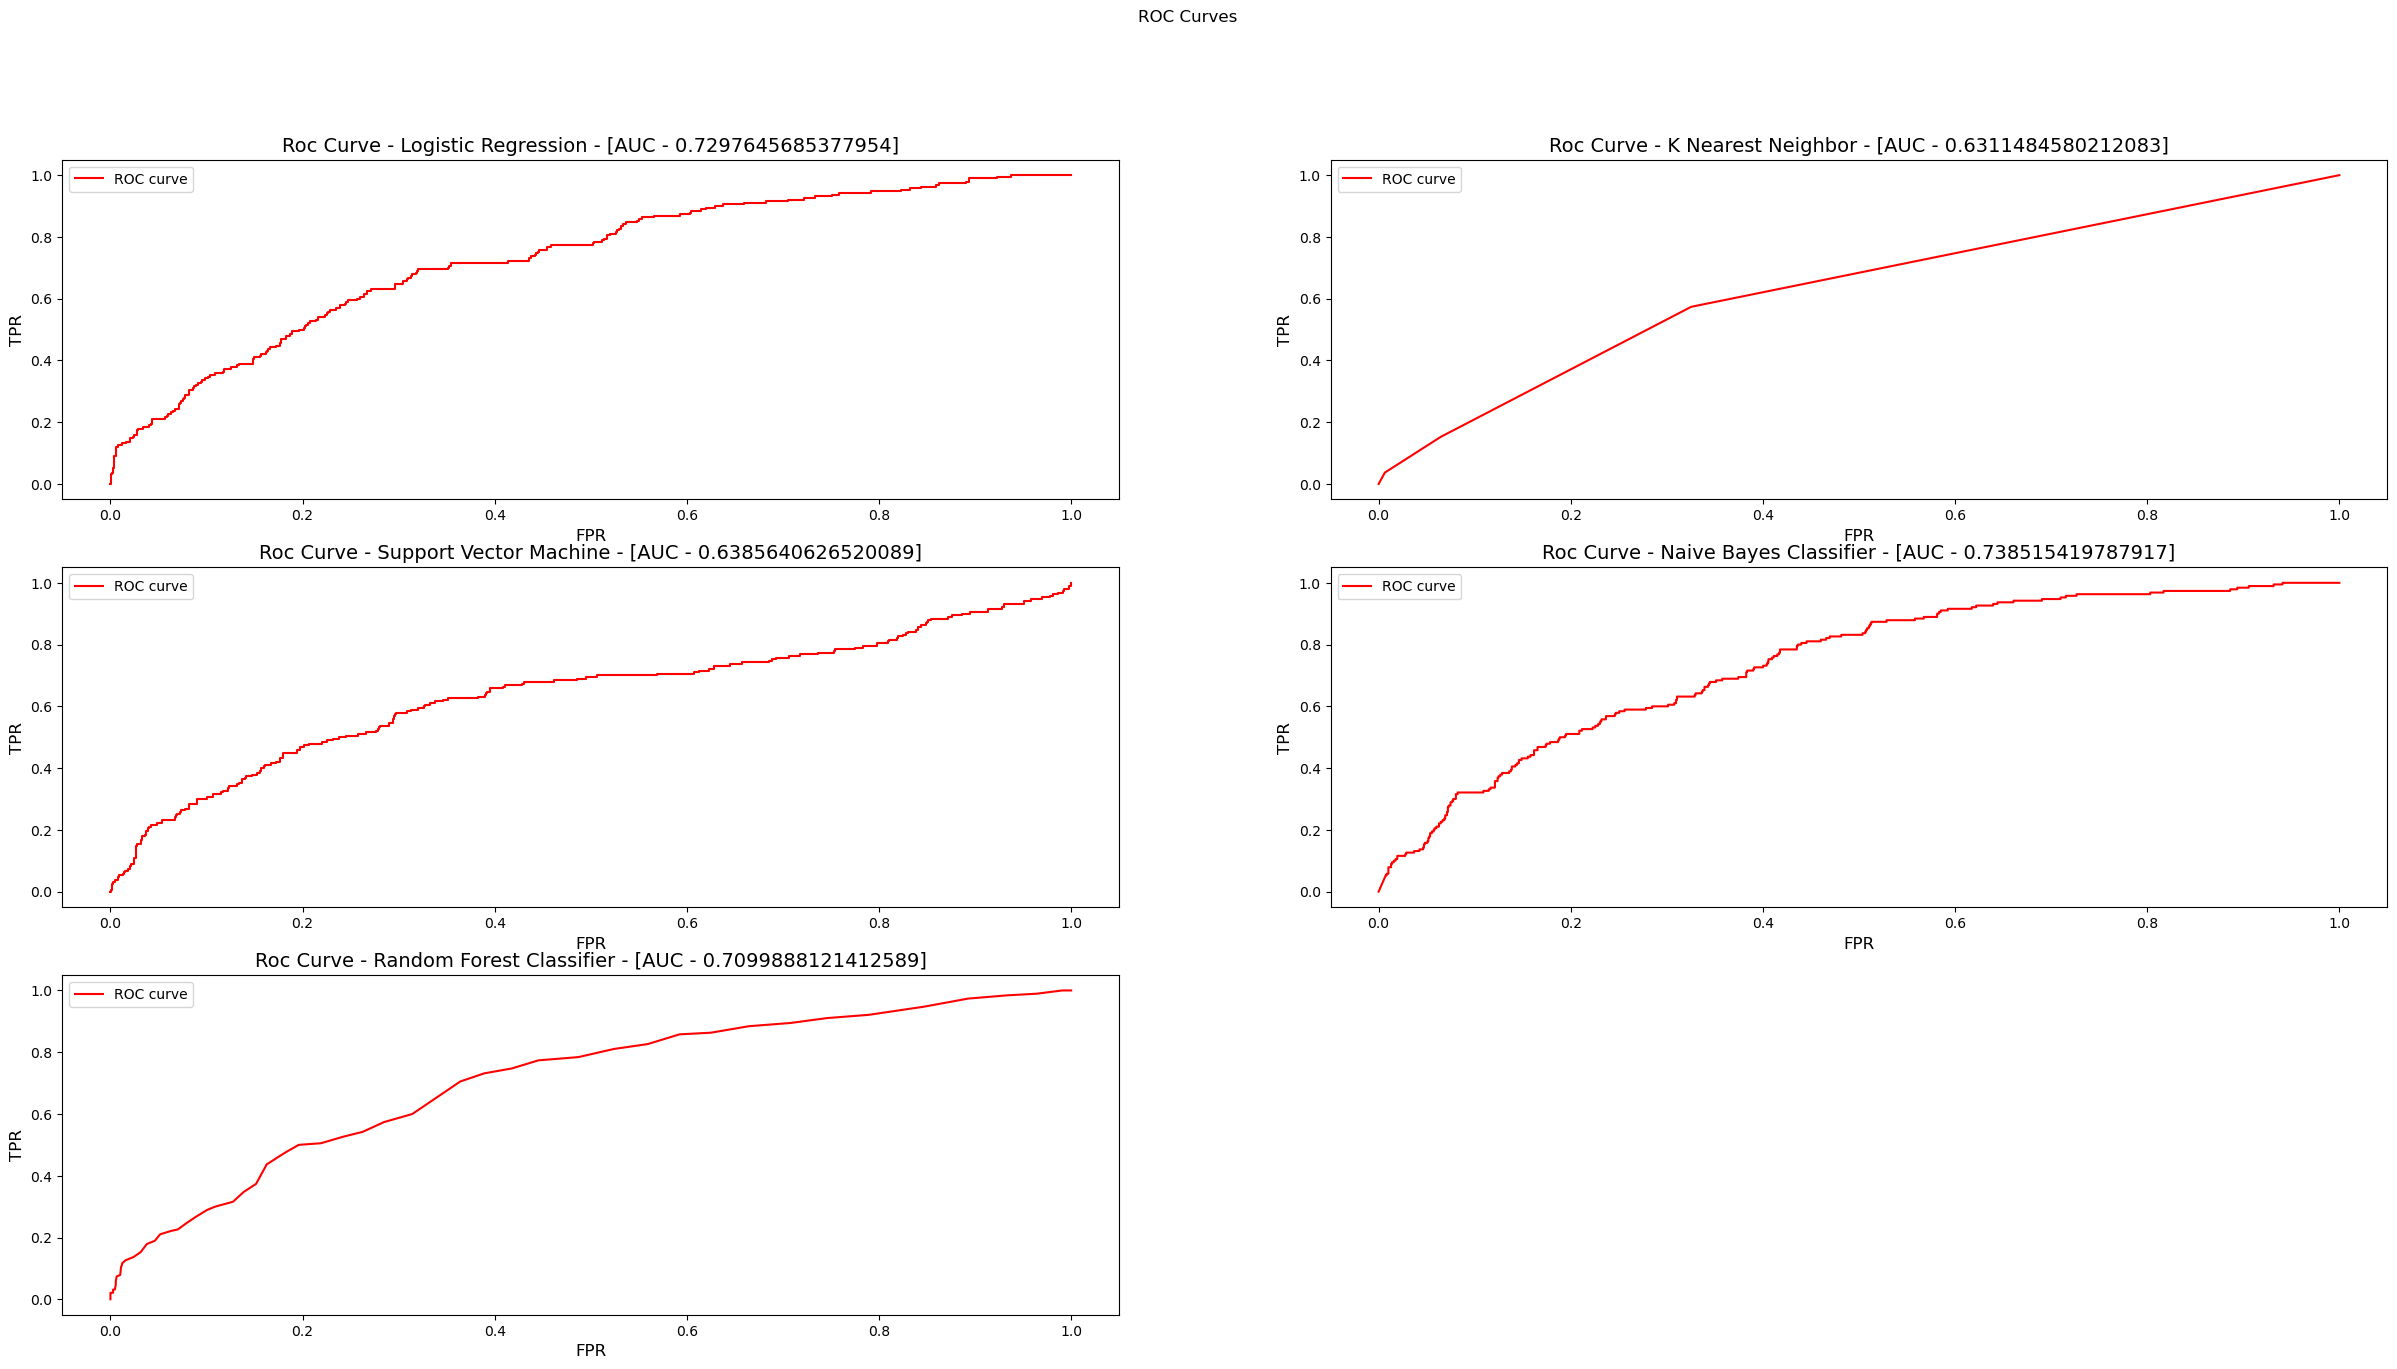

In [25]:
print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_knn_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'K Nearest Neighbor', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_knn_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_knn_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()

# The results look not bad! But there is a really bad problem...

# SMOTE for Imbalanced Classification

In [26]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [27]:
oversample = SMOTE()
over_sampled_X_train, over_sampled_y_train = oversample.fit_resample(X_train, y_train)

NameError: name 'SMOTE' is not defined

In [21]:
lc = LogisticRegression()
neigh = KNeighborsClassifier(n_neighbors=3)
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

In [22]:
lc.fit(over_sampled_X_train, over_sampled_y_train)
neigh.fit(over_sampled_X_train, over_sampled_y_train)
svc.fit(over_sampled_X_train, over_sampled_y_train)
nbc.fit(over_sampled_X_train, over_sampled_y_train)
rfc.fit(over_sampled_X_train, over_sampled_y_train)

RandomForestClassifier()

In [23]:
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_knn_predicted = neigh.predict(X_test)
y_knn_pred_proba = neigh.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_knn_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1082
           1       0.25      0.63      0.36       190

    accuracy                           0.67      1272
   macro avg       0.58      0.65      0.57      1272
weighted avg       0.81      0.67      0.72      1272

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1082
           1       0.20      0.44      0.28       190

    accuracy                           0.66      1272
   macro avg       0.54      0.57      0.53      1272
weighted avg       0.78      0.66      0.71      1272

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1082
           1       0.24      0.51      0.33       190

    accuracy                           0.69      1272
   macro avg       0.57      0.62      0.56      1272
weighted avg       0.80      0.69      0.73      1272

              preci

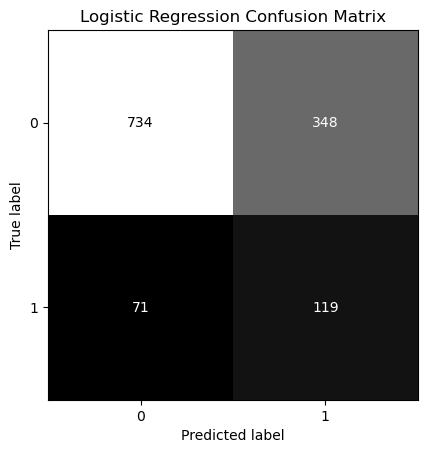

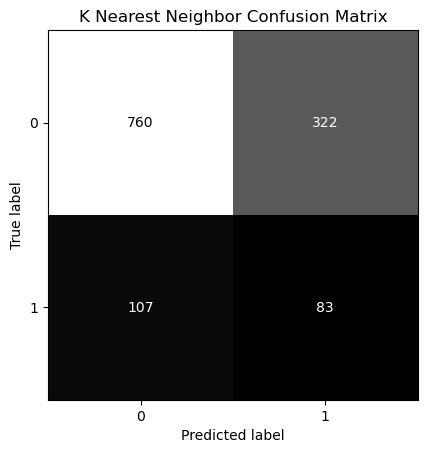

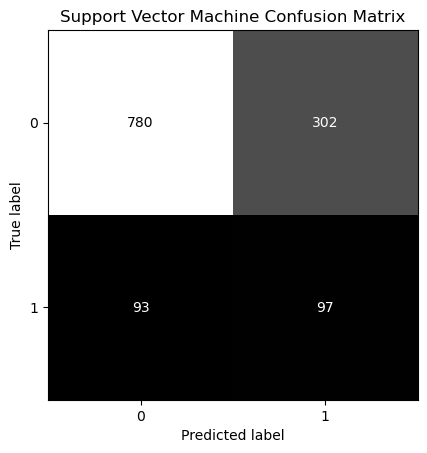

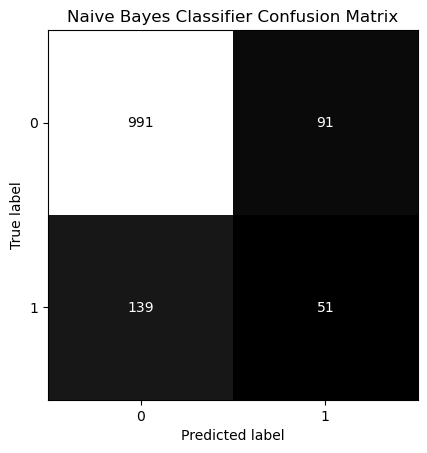

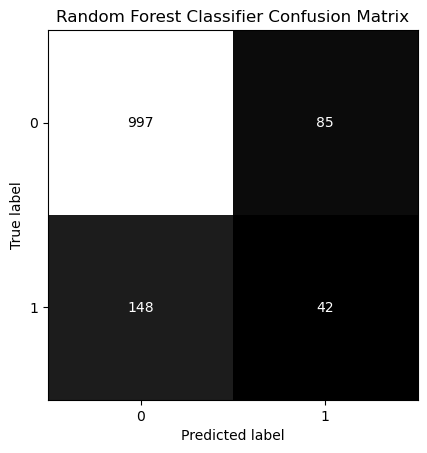

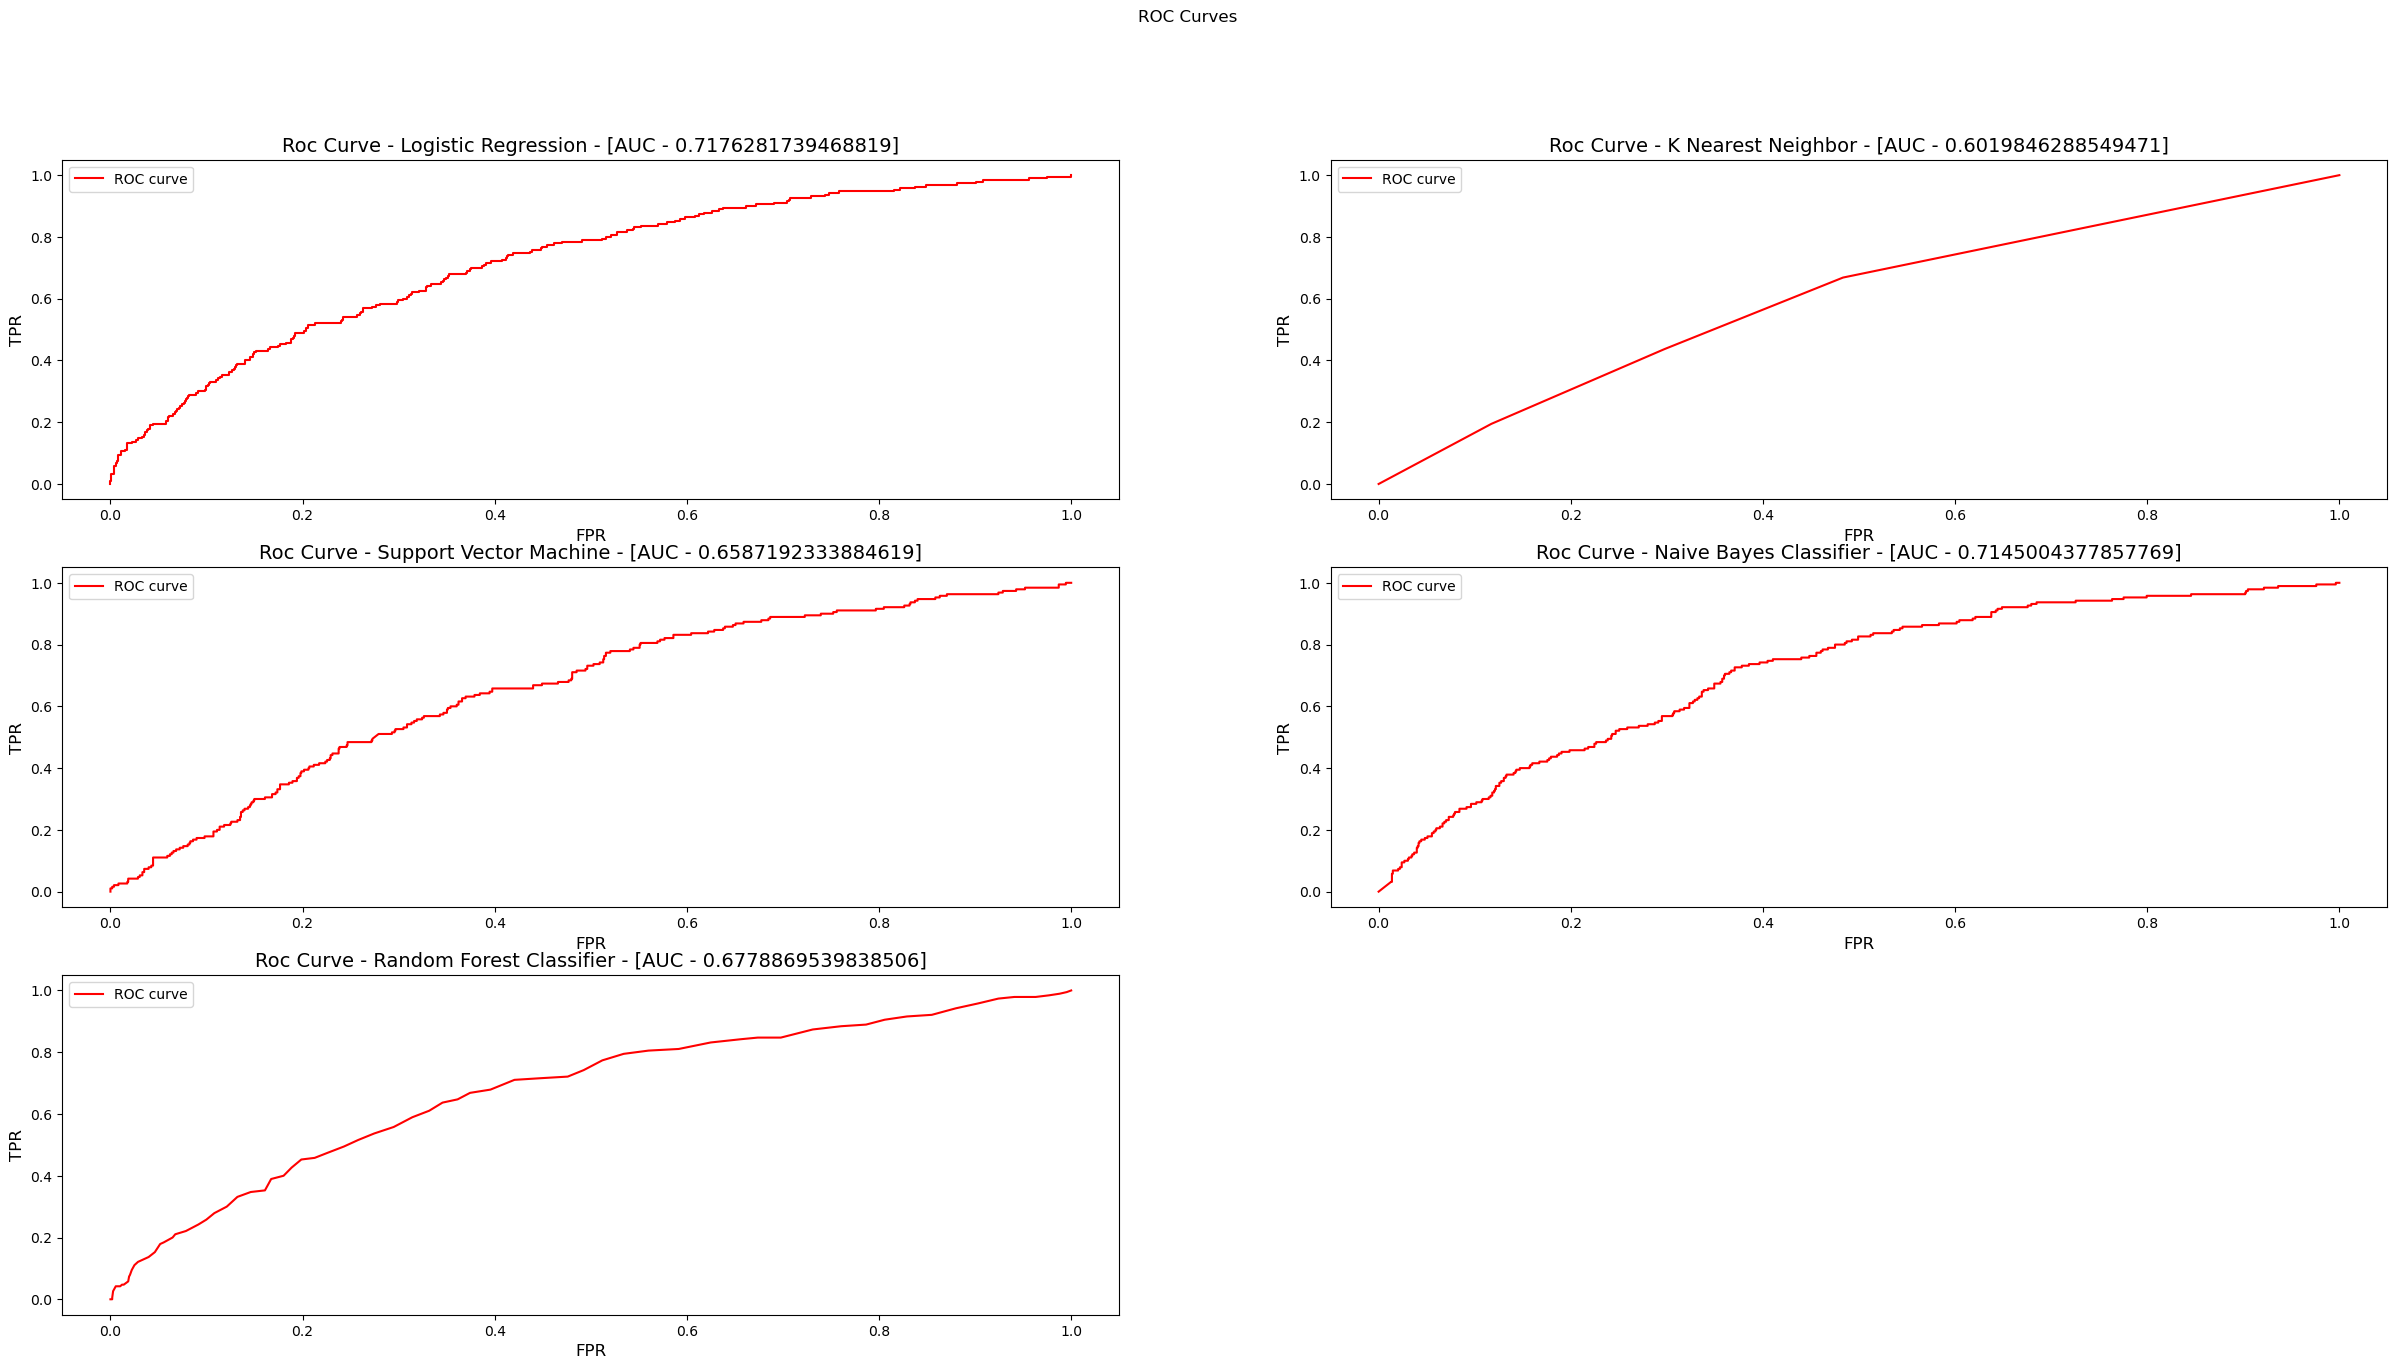

In [24]:
models = ['Logistic Regression', 'K Nearest Neighbor', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_knn_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_knn_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()